<a href="https://colab.research.google.com/github/yashodharatomar/credit_card_fraud_detection/blob/main/CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_link = "/content/drive/MyDrive/creditcard.csv"
data = pd.read_csv(file_link, sep=",")
print(data.head())
x = data.drop(['Class'], axis=1)
y = data['Class']

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!pip install catboost

# Import CatBoostClassifier
from catboost import CatBoostClassifier

# Create CatBoost Model
clf = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=1234)

# Fit to our data
clf.fit(x_train, y_train)

# Generate class probabilities
y_pred = clf.predict(x_test, prediction_type='RawFormulaVal')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00
0:	learn: 0.3708742	total: 327ms	remaining: 5m 27s
1:	learn: 0.1920698	total: 485ms	remaining: 4m 2s
2:	learn: 0.1058333	total: 662ms	remaining: 3m 39s
3:	learn: 0.0599721	total: 802ms	remaining: 3m 19s
4:	learn: 0.0360768	total: 952ms	remaining: 3m 9s
5:	learn: 0.0229044	total: 1.07s	remaining: 2m 57s
6:	learn: 0.0155276	total: 1.19s	remaining: 2m 49s
7:	learn: 0.0113670	total: 1.4s	remaining: 2m 54s
8:	learn: 0.0085783	total: 1.55s	remaining: 2m 50s
9:	learn: 0.0067421	total: 1.71s	remaining: 2m 49s
10:	learn: 0.0054393	total: 1.84s	remaining: 2m 45s
11:	learn: 0.0045492	total: 2.01s	remaining: 2m 45s
12:	learn: 0.0040747	total: 2.16s	remaining: 2m 44s
13:	learn: 0.0036881	total: 2.36s	remaining: 2m 45s
14:	learn: 0.0033959	total: 2.6s	remaining: 2m 50s
15:	learn: 0.0032003	total: 2.85s	remaining: 2m 55s
16:	learn: 0.0030455	total: 2.97s	remaining: 2m 51s
17:	learn: 0.0029289	total: 3.13s	remaining: 2m 50

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9724328532763696


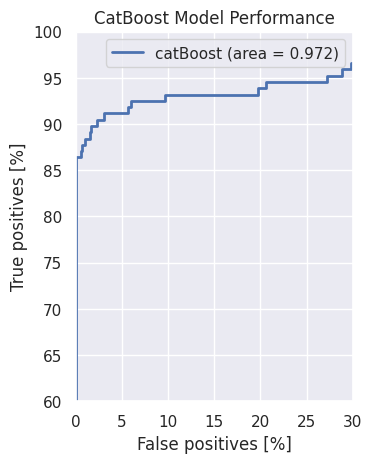

In [ ]:
plt.plot(100*false_positive_rate, 100*true_positive_rate, label= 'catBoost (area = {:.3f})'.format(roc_auc), linewidth=2)
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([0,30])
plt.ylim([60,100])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('CatBoost Model Performance')
plt.legend(loc='best')
plt.show()